<a href="https://colab.research.google.com/github/ahliminha/cancer_study/blob/master/Lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!ls

drive  sample_data


In [5]:
data = pd.read_csv('/content/drive/My Drive/Trabalho/Dream/msk_impact_2017_clinical_data.tsv', sep="\t")
data.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Sample Class,Sample Collection Source,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Smoking History,Specimen Preservation Type,Specimen Type,Tumor Purity,Patient's Vital Status
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16,IDC,NaN,0:LIVING,Breast,Tumor,Outside,1,428,Primary,Female,Unknown,FFPE,Biopsy,50.0,ALIVE
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7,IDC,NaN,1:DECEASED,Breast,Tumor,In-House,1,281,Metastasis,Female,Never,FFPE,Biopsy,40.0,DECEASED
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5,PEMESO,8.71,1:DECEASED,Peritoneum,Tumor,In-House,1,454,Primary,Male,Never,FFPE,Biopsy,30.0,DECEASED
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6,UEC,36.75,0:LIVING,Uterus,Tumor,In-House,1,1016,Metastasis,Female,Prev/Curr Smoker,FFPE,Resection,40.0,ALIVE
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1,USC,8.81,0:LIVING,Uterus,Tumor,In-House,2,1161,Primary,Female,Never,FFPE,Resection,NaN,ALIVE


In [6]:
data['Cancer Type'].describe()

count                          10945
unique                            59
top       Non-Small Cell Lung Cancer
freq                            1668
Name: Cancer Type, dtype: object

In [7]:
lung_cancer = data.loc[data['Cancer Type'] == 'Non-Small Cell Lung Cancer']

In [8]:
lung_cancer.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Sample Class,Sample Collection Source,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Smoking History,Specimen Preservation Type,Specimen Type,Tumor Purity,Patient's Vital Status
8,msk_impact_2017,P-0000030,P-0000030-T01-IM3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250.0,0.4730,Unmatched,Lymph Node,10,LUAD,NaN,0:LIVING,Lung,Tumor,Outside,1,757,Metastasis,Female,Unknown,FFPE,Biopsy,40.0,ALIVE
10,msk_impact_2017,P-0000036,P-0000036-T01-IM3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,50.0,0.0185,Unmatched,NaN,3,LUAD,NaN,0:LIVING,Lung,Tumor,In-House,1,380,Primary,Female,Never,FFPE,Biopsy,30.0,ALIVE
44,msk_impact_2017,P-0000082,P-0000082-T01-IM3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250.0,0.3606,Matched,NaN,12,LUAD,NaN,0:LIVING,Lung,Tumor,In-House,1,905,Primary,Male,Prev/Curr Smoker,FFPE,Resection,NaN,ALIVE
63,msk_impact_2017,P-0000110,P-0000110-T01-IM3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250.0,0.2474,Matched,NaN,15,LUAD,33.5,0:LIVING,Lung,Tumor,In-House,1,866,Primary,Male,Prev/Curr Smoker,FFPE,Resection,50.0,ALIVE
85,msk_impact_2017,P-0000133,P-0000133-T01-IM3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,90.0,0.0026,Matched,NaN,4,LUAD,NaN,1:DECEASED,Lung,Tumor,In-House,1,529,Primary,Female,Never,FFPE,Biopsy,30.0,DECEASED


In [9]:
lung_cancer.describe()

,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,Tumor Purity
count,1668.000000,1668.000000,1668.000000,1542.000000,1668.000000,1668.000000,1543.000000
mean,227.806174,0.178543,7.918465,10.549481,1.130695,758.027578,38.328581
std,50.690554,0.187114,8.125696,6.840215,0.351113,258.055014,20.266391
min,50.000000,0.000000,0.000000,0.000000,1.000000,52.000000,10.000000
25%,250.000000,0.018400,3.000000,5.530000,1.000000,583.000000,20.000000
50%,250.000000,0.119300,6.000000,9.140000,1.000000,776.000000,30.000000
75%,250.000000,0.286075,10.000000,14.852500,1.000000,940.000000,50.000000
max,250.000000,0.883200,89.000000,38.400000,3.000000,2073.000000,90.000000


In [10]:
lung_cancer.corr()

,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,Tumor Purity
DNA Input,1.000000,-0.050670,0.030228,-0.003130,0.026961,0.357465,0.040604
Fraction Genome Altered,-0.050670,1.000000,0.200521,0.002899,0.018535,-0.075831,0.402124
Mutation Count,0.030228,0.200521,1.000000,-0.029639,-0.069854,0.025461,0.108574
Overall Survival (Months),-0.003130,0.002899,-0.029639,1.000000,0.225490,-0.169929,-0.025093
Number of Samples Per Patient,0.026961,0.018535,-0.069854,0.225490,1.000000,-0.010236,-0.006358
Sample coverage,0.357465,-0.075831,0.025461,-0.169929,-0.010236,1.000000,0.021860
Tumor Purity,0.040604,0.402124,0.108574,-0.025093,-0.006358,0.021860,1.000000


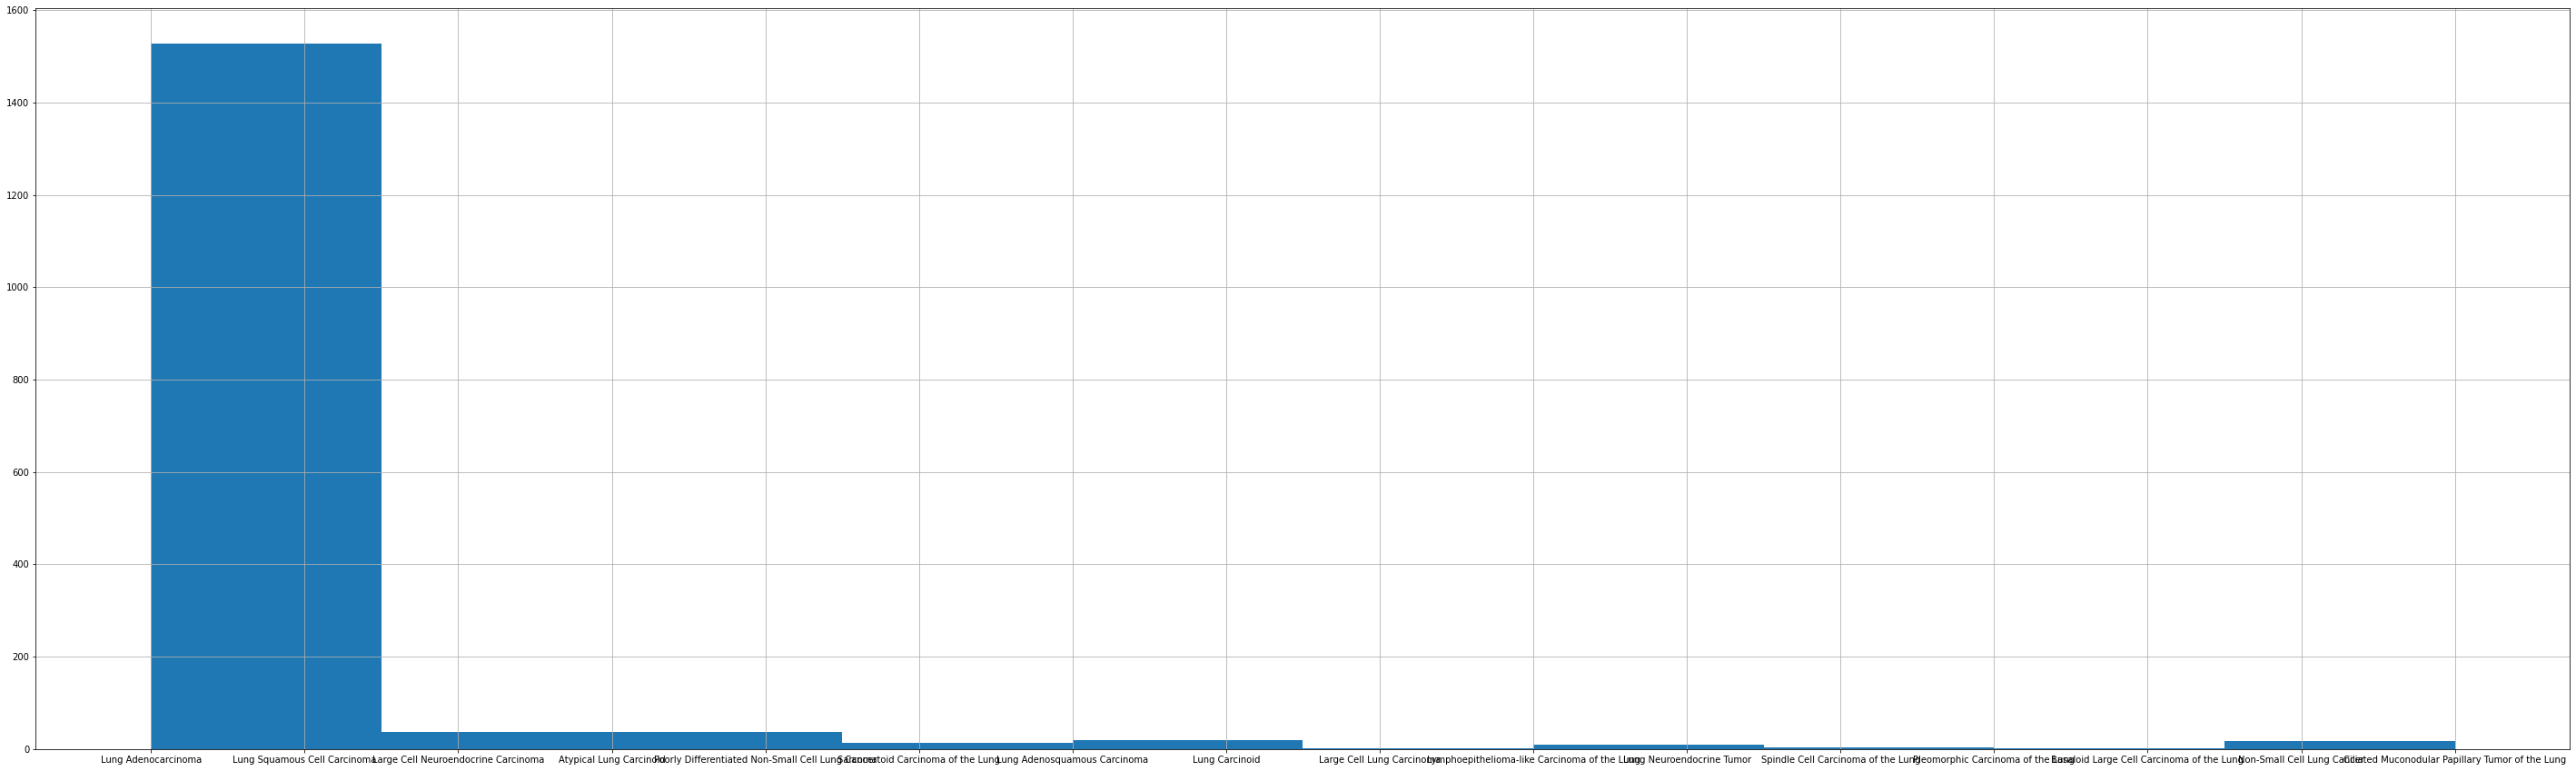

In [11]:
lung_cancer["Cancer Type Detailed"].hist(figsize=(50,15))

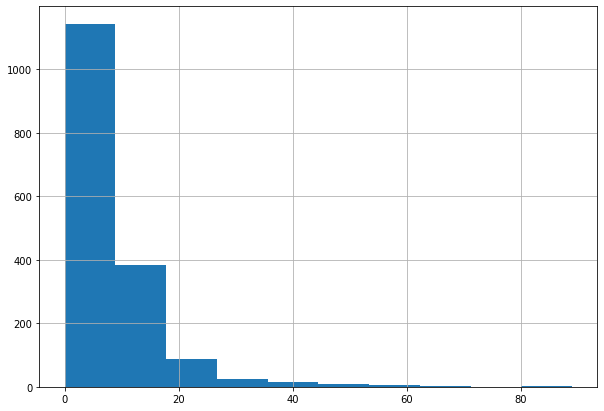

In [12]:
lung_cancer["Mutation Count"].hist(figsize=(10,7), bins=10)

In [13]:
lung_cancer["Mutation Count"].describe()

count    1668.000000
mean        7.918465
std         8.125696
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        89.000000
Name: Mutation Count, dtype: float64

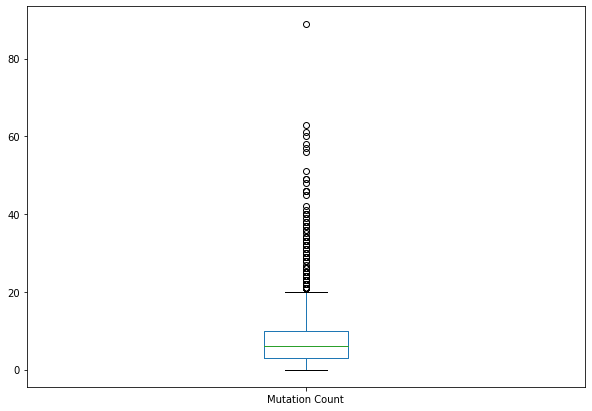

In [14]:
lung_cancer["Mutation Count"].plot.box(figsize=(10,7))

In [15]:
lung_cancer["Metastatic Site"].value_counts()

Lymph Node             234
Liver                   83
Pleura                  76
Brain                   62
Bone                    50
Pleural Fluid           25
Adrenal Gland           22
Chest Wall              15
Soft Tissue             12
Lung                    11
Spine                    5
Neck                     5
Mediastinum              5
Pericardium              5
Epidural                 5
Adrenal                  5
Omentum                  4
Skin                     4
Abdomen                  4
Pancreas                 3
Breast                   3
Colon                    3
Peritoneum               2
Retroperitoneum          2
Back                     2
Rib                      2
Stomach                  2
Muscle                   1
Subcutaneous Tissue      1
Paratracheal             1
Thigh                    1
Heart                    1
Infrahilar mass          1
Rectum                   1
Paraspinal               1
Spleen                   1
Spinal Cord              1
R

In [16]:
print(np.where(lung_cancer["Metastatic Site"] == "Lung") )

(array([ 212,  372,  459,  553,  640,  699,  711,  713,  723,  854, 1277]),)


In [17]:
mask = lung_cancer["Metastatic Site"] == 'Lung'
lung_cancer[mask]

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Sample Class,Sample Collection Source,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Smoking History,Specimen Preservation Type,Specimen Type,Tumor Purity,Patient's Vital Status
1644,msk_impact_2017,P-0001724,P-0001724-T01-IM3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250.00,0.1331,Matched,Lung,5,LUAD,4.57,1:DECEASED,Lung,Tumor,In-House,1,378,Metastasis,Male,Prev/Curr Smoker,FFPE,Biopsy,NaN,DECEASED
2679,msk_impact_2017,P-0002768,P-0002768-T01-IM3,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250.00,0.2002,Matched,Lung,4,LUAD,19.53,0:LIVING,Lung,Tumor,In-House,1,565,Metastasis,Female,Never,FFPE,Biopsy,30.0,ALIVE
3175,msk_impact_2017,P-0003274,P-0003274-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,54.74,0.1558,Matched,Lung,3,LUAD,20.71,0:LIVING,Lung,Tumor,In-House,1,421,Metastasis,Female,Prev/Curr Smoker,FFPE,Biopsy,20.0,ALIVE
3811,msk_impact_2017,P-0003923,P-0003923-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,214.50,0.2123,Matched,Lung,11,LUAD,16.17,0:LIVING,Lung,Tumor,In-House,1,635,Metastasis,Female,Prev/Curr Smoker,FFPE,Biopsy,40.0,ALIVE
4367,msk_impact_2017,P-0004496,P-0004496-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,107.21,0.3405,Unmatched,Lung,2,LUAD,18.41,0:LIVING,Lung,Tumor,In-House,1,546,Metastasis,Female,Never,DNA,Biopsy,50.0,ALIVE
4808,msk_impact_2017,P-0004927,P-0004927-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,185.20,0.7614,Matched,Lung,5,LUAD,11.77,1:DECEASED,Lung,Tumor,In-House,1,1009,Metastasis,Female,Never,DNA,Biopsy,50.0,DECEASED
4911,msk_impact_2017,P-0005034,P-0005034-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,156.20,0.6423,Matched,Lung,6,LUAD,5.29,1:DECEASED,Lung,Tumor,In-House,1,979,Metastasis,Male,Prev/Curr Smoker,DNA,Biopsy,70.0,DECEASED
4935,msk_impact_2017,P-0005059,P-0005059-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,94.50,0.0001,Matched,Lung,5,LUAD,NaN,0:LIVING,Lung,Tumor,In-House,1,968,Metastasis,Male,Prev/Curr Smoker,DNA,Biopsy,10.0,ALIVE
5026,msk_impact_2017,P-0005148,P-0005148-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250.00,0.3387,Matched,Lung,8,LUAD,16.40,0:LIVING,Lung,Tumor,In-House,1,868,Metastasis,Male,Never,DNA,Biopsy,20.0,ALIVE
5953,msk_impact_2017,P-0006105,P-0006105-T01-IM5,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,250.00,0.2562,Matched,Lung,5,LUAD,15.84,0:LIVING,Lung,Tumor,In-House,1,800,Primary,Male,Never,DNA,Resection,40.0,ALIVE


In [18]:
lung_cancer.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered',
       'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class', 'Sample Collection Source',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Specimen Preservation Type', 'Specimen Type',
       'Tumor Purity', 'Patient's Vital Status'],
      dtype='object')

In [19]:
columns = ['Cancer Type Detailed', 'DNA Input', 'Fraction Genome Altered', 'Matched Status', 'Metastatic Site', 'Mutation Count', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Primary Tumor Site', 'Sample Class',
       'Number of Samples Per Patient', 'Sample coverage', 'Sample Type',
       'Sex', 'Smoking History', 'Specimen Preservation Type',
       'Tumor Purity', "Patient's Vital Status"]

In [20]:
lung_clean = lung_cancer.loc[:, columns]

In [21]:
lung_clean.head()

,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Smoking History,Specimen Preservation Type,Tumor Purity,Patient's Vital Status
8,Lung Adenocarcinoma,250.0,0.4730,Unmatched,Lymph Node,10,LUAD,NaN,0:LIVING,Lung,Tumor,1,757,Metastasis,Female,Unknown,FFPE,40.0,ALIVE
10,Lung Adenocarcinoma,50.0,0.0185,Unmatched,NaN,3,LUAD,NaN,0:LIVING,Lung,Tumor,1,380,Primary,Female,Never,FFPE,30.0,ALIVE
44,Lung Adenocarcinoma,250.0,0.3606,Matched,NaN,12,LUAD,NaN,0:LIVING,Lung,Tumor,1,905,Primary,Male,Prev/Curr Smoker,FFPE,NaN,ALIVE
63,Lung Adenocarcinoma,250.0,0.2474,Matched,NaN,15,LUAD,33.5,0:LIVING,Lung,Tumor,1,866,Primary,Male,Prev/Curr Smoker,FFPE,50.0,ALIVE
85,Lung Adenocarcinoma,90.0,0.0026,Matched,NaN,4,LUAD,NaN,1:DECEASED,Lung,Tumor,1,529,Primary,Female,Never,FFPE,30.0,DECEASED
